# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255.0
x_Test_normalize = x_Test / 255.0

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型

In [8]:
# 記得剛開始都要輸入input_shape or input_dim喔～～
model = Sequential()
model.add(Dense(units=256, input_dim=784,activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# 訓練模型

In [9]:
model.compile(loss='categorical_crossentropy', 
                                 optimizer='adam', 
                                 metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_Train_normalize,
                                                    y=y_Train_OneHot,
                                                    validation_split=0.2, 
                                                    epochs=10, 
                                                    batch_size=32,
                                                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.2362 - accuracy: 0.9290 - val_loss: 0.1138 - val_accuracy: 0.9657
Epoch 2/10
48000/48000 [==============================] - 3s 60us/step - loss: 0.0973 - accuracy: 0.9704 - val_loss: 0.1019 - val_accuracy: 0.9704
Epoch 3/10
48000/48000 [==============================] - 3s 60us/step - loss: 0.0665 - accuracy: 0.9791 - val_loss: 0.0857 - val_accuracy: 0.9743
Epoch 4/10
48000/48000 [==============================] - 3s 60us/step - loss: 0.0522 - accuracy: 0.9835 - val_loss: 0.0980 - val_accuracy: 0.9731
Epoch 5/10
48000/48000 [==============================] - 3s 60us/step - loss: 0.0385 - accuracy: 0.9876 - val_loss: 0.1062 - val_accuracy: 0.9704
Epoch 6/10
48000/48000 [==============================] - 3s 64us/step - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.1051 - val_accuracy: 0.9720
Epoch 7/10
48000/48000 [==============================] - 3s 61us/st

# 以圖形顯示訓練過程

In [11]:
import matplotlib.pyplot as plt

def  show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

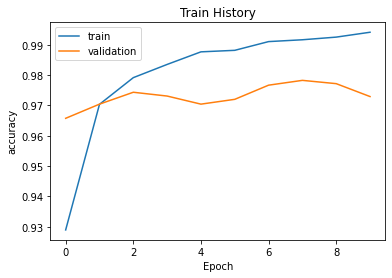

In [15]:
show_train_history(train_history,'accuracy','val_accuracy')

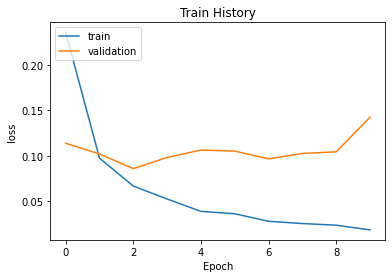

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('accuracy=', scores[1])

10000/10000 [==============================] - 0s 13us/step
accuracy= 0.972000002861023
